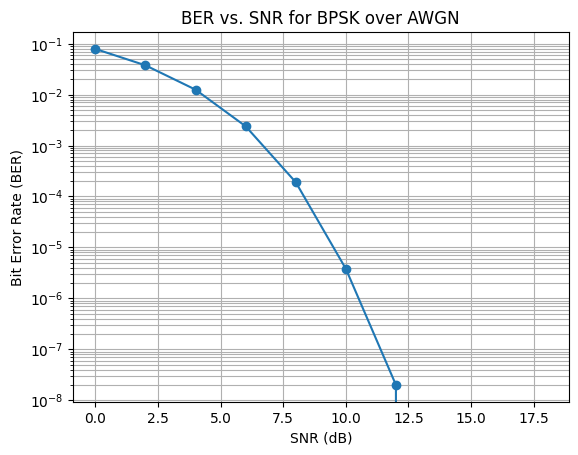

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Generate 1000 random bits
# num_bits = 1000000
# bits = np.random.randint(0, 2, num_bits)

# #  Define transmission voltage based on power
# power = 10**-7  # recived power

# voltage = np.sqrt(power)  # Voltage representation (from professor's notes)
# threshold = voltage/2  # Detection threshold at half the voltage
##########################################################################################################
#this is to get the voltage printed and the threshold voltage                                            #
##########################################################################################################
# print("voltage",voltage)
# print("threshold voltage",threshold)

# Multiply bits by voltage
# transmitted_signal = bits * voltage  # 0 remains 0, 1 becomes transmitted voltage

#  Generate Gaussian noise with proper variance
# noise_variance = power / 20  # sign to noise ratio 10log(signal power/noise power)
###########################################################################################################
#notice the higher the the DB level the higher the accuracy  for the bits being transmiited               #
###########################################################################################################

###################################################################################################################
# this function will generate 1000 random bits                                                                    #
# the 0 is were the noise is center around becasue google said mean in a commucation system is center around zero #
# np.s is the deviation that was define from above                                                                #
# numb_bit is the size of the generated function                                                                  #
###################################################################################################################
# noise = np.random.normal(0, np.sqrt(noise_variance), num_bits)  # Proper scaling of noise


# Display first 100 noise values or 10% of the toltal transmittet bis
#print("Generated Noise (First 100 samples):", noise[:100])

######################################################################################################################
# Gaussian noise to a transmitted signal simulating how real-world signals get affected by noise during transmission #
######################################################################################################################
# received_signal = transmitted_signal + noise

#  Detection threshold
# decoded_bits = (received_signal >= threshold).astype(int)  # Logical operation for decision

# Compute Bit Error Rate (BER)
# bit_errors = np.sum(decoded_bits != bits)# calcuates the total number of bit errors
# ber = bit_errors / num_bits # diving the total erros by total bits

# Display results
#print("Transmitted Bits:", bits[:20])  # Show first 20 transmitted bits
#print("Received Signal:", received_signal[:20])  # Show first 20 received signals
#print("Decoded Bits:", decoded_bits[:20])  # Show first 20 decoded bits
# print(f"Total Bit Errors: {bit_errors}")
# print(f"Bit Error Rate (BER): {ber:.5f}")


num_bits = 100000000
# bits = np.random.randint(0, 2, num_bits)

#  Define transmission voltage based on power
power = 10**-7  # recived power

voltage = np.sqrt(power)  # Voltage representation (from professor's notes)
amplitude = voltage  # Detection threshold at half the voltage
#num_bits = 100000  # Total bits for improved accuracy
snr_db_values = np.arange(0, 20, 2)  # SNR in dB steps of 2
ber_results = []  # Store BER values

# Loop SNR values
########################################################################################################################
# this loop will iterate throught each SNR value                                                                       #
# each interation will have a new value assign from them snr_db_value to the snr_db                                    #
########################################################################################################################
for snr_db in snr_db_values:
    snr_linear = (10**(snr_db /10))  # SNR dB to linear and take the reciprocal to inver the SNR value
    # h = np.sqrt(snr_linear)  # channel gain H
    noise_var = power/snr_linear

    # Generate bits
    ####################################################################################################################
    # Each element is either a 1 or a 0                                                                                #
    ####################################################################################################################
    bits = np.random.randint(0, 2, num_bits)# created an array
    transmitted_signal = np.where(bits == 0, amplitude, -amplitude) # 0 is +1 and 1 is -1

    # Generate noise: n = (1/sqrt(2)) * random(0,1) + j (1/sqrt(2)) * random(0,1)
    noise_real = (1 / np.sqrt(2)) * np.random.normal(0,np.sqrt(noise_var),num_bits)

    # print(noise_real)
    noise_imag = (1 / np.sqrt(2)) * np.random.normal(0,np.sqrt(noise_var),num_bits)

    # print(noise_imag)

    # input()
    ####################################################################################################################
    # 1/h is scaling the noise                                                                                         #
    # dividing by H increase the noise as SNR decases                                                                  #
    # to keep the noise to signal relationship                                                                         #
    #Lower SNR weaker the single , Higher the SNR the lower the noise variance                                         #
    ####################################################################################################################
    noise =(noise_real + 1j * noise_imag)  # Complex Gaussian noise
    # print(noise)
    # input()
    # output signal and reception (y = hx + n)
    received_signal = transmitted_signal + noise

    # print(received_signal)
    # input()

    # Take real part only
    #####################################################################################################################
    # going to recive the single and going to ignor any imaginary =j and the number attached with j                     #
    #####################################################################################################################
    received_signal_real = np.real(received_signal)
    # print(received_signal_real)
    # input()

    # Decode bits
    #######################################################################################################################
    # compaire each number of bits received to 0                                                                          #
    # converts boolean array 1= true , 0= false                                                                           #
    # if we recive a less then 0 it is a 1                                                                                #
    # if we recive a greater then or equal to 0 it is a 0                                                                 #
    #######################################################################################################################
    decoded_bits = (received_signal_real < 0).astype(int)

    # print(decoded_bits)

    # Bit Error Rate (BER)
    bit_errors = np.sum(decoded_bits != bits)# boolean array 1= true , 0= false count the number of true
    bers = bit_errors / num_bits# calulate the number of bit erros / number of bit transmited
    ber_results.append(bers)# stores BERs values

    # print(ber_results)


    # print(f"SNR (dB): {snr_db}, BER: {ber:.10f}")
# input()
# Plot BER vs. SNR
plt.figure()
plt.semilogy(snr_db_values, ber_results, marker='o', linestyle='-')
plt.xlabel("SNR (dB)")
plt.ylabel("Bit Error Rate (BER)")
plt.title("BER vs. SNR for BPSK over AWGN")

plt.grid(True, which='both')

plt.show()